# Lab 2

## Spatial Object and Data Types (Vector)

To start off we need to import some pivotal packages you will be working with this semester; shapely, pandas and geopandas

Shapely documentation: https://shapely.readthedocs.io/en/latest/ 

Pandas documentation: https://pandas.pydata.org/

GeoPandas documentation: http://geopandas.org/

Shapely is the all-around geometrical library, Pandas is great for working with tabular data, and GeoPandas is its spatial sibling!

In [4]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

If you get an error like "package doesn't exist" or the like, then we need to load that package.  Please look in the guide folder for the _download package_ file.  Follow instructions for all packages you need to download. Probably just geopandas but maybe shapely too. Use pip!

In [1]:
!pip --version

pip 18.1 from /anaconda3/lib/python3.6/site-packages/pip (python 3.6)


In [2]:
!pip install geopandas

You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Now that we have all the packages loaded in correctly, lets try and access some documentation another way. Within the python shell it is possible to access information from within the package itself. Lets specify a few here. 

In [5]:
help(os)

Help on module os:

NAME
    os - OS routines for NT or Posix depending on what system we're on.

MODULE REFERENCE
    https://docs.python.org/3.6/library/os
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This exports:
      - all functions from posix or nt, e.g. unlink, stat, etc.
      - os.path is either posixpath or ntpath
      - os.name is either 'posix' or 'nt'
      - os.curdir is a string representing the current directory (always '.')
      - os.pardir is a string representing the parent directory (always '..')
      - os.sep is the (or a most common) pathname separator ('/' or '\\')
      - os.extsep is the extension separator (always '.')
      - os.altsep is the alternate pathname se

In [6]:
help(gpd)

Help on package geopandas:

NAME
    geopandas

PACKAGE CONTENTS
    _compat
    _version
    base
    datasets (package)
    geodataframe
    geoseries
    io (package)
    plotting
    sindex
    tests (package)
    tools (package)

VERSION
    0.3.0

FILE
    /anaconda3/lib/python3.6/site-packages/geopandas/__init__.py




In [7]:
help(gpd.geodataframe)

Help on module geopandas.geodataframe in geopandas:

NAME
    geopandas.geodataframe

CLASSES
    geopandas.base.GeoPandasBase(builtins.object)
        GeoDataFrame(geopandas.base.GeoPandasBase, pandas.core.frame.DataFrame)
    pandas.core.frame.DataFrame(pandas.core.generic.NDFrame)
        GeoDataFrame(geopandas.base.GeoPandasBase, pandas.core.frame.DataFrame)
    
    class GeoDataFrame(geopandas.base.GeoPandasBase, pandas.core.frame.DataFrame)
     |  A GeoDataFrame object is a pandas.DataFrame that has a column
     |  with geometry. In addition to the standard DataFrame constructor arguments,
     |  GeoDataFrame also accepts the following keyword arguments:
     |  
     |  Keyword Arguments
     |  -----------------
     |  crs : str (optional)
     |      Coordinate system
     |  geometry : str or array (optional)
     |      If str, column to use as geometry. If array, will be set as 'geometry'
     |      column on GeoDataFrame.
     |  
     |  Method resolution order:
   

As you can see, accessing documentation is as simple as using the help() function.  You can then dive into specific functions within a library by using the. So to access documentation on the geodataframe object we use the "gpd.geodataframe".

### Spatial Objects

As we discussed in the previous lecture, vectors include three basic types of spatial objects. Lets go ahead and get started on the first one; Points. 

### Points

A point is very basically: a discrete location that is geographically defined by its coordinates.  We will discuss coordinate planes at a later point but for now the key information that defines a point is:
* Latitude - North vs. South Position (0 - 90 Degrees)
* Longitude - East vs. West position (0 - 180 Degress)


You can create a point object using Shapely.

In [8]:
help(Point)

Help on class Point in module shapely.geometry.point:

class Point(shapely.geometry.base.BaseGeometry)
 |  A zero dimensional feature
 |  
 |  A point has zero length and zero area.
 |  
 |  Attributes
 |  ----------
 |  x, y, z : float
 |      Coordinate values
 |  
 |  Example
 |  -------
 |    >>> p = Point(1.0, -1.0)
 |    >>> print(p)
 |    POINT (1.0000000000000000 -1.0000000000000000)
 |    >>> p.y
 |    -1.0
 |    >>> p.x
 |    1.0
 |  
 |  Method resolution order:
 |      Point
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args)
 |      Parameters
 |      ----------
 |      There are 2 cases:
 |      
 |      1) 1 parameter: this must satisfy the numpy array protocol.
 |      2) 2 or more parameters: x, y, z : float
 |          Easting, northing, and elevation.
 |  
 |  array_interface(self)
 |      Provide the Numpy array protocol.
 |  
 |  svg(self, scale_factor=1.0, fill_color=None)
 |      Returns

In [9]:
my_first_point = Point(7.4, 1.3)

While not typically something you will do later in your programming development, it is always good to make sure you know exactly what type of object you are dealing with.  Particularly after instantiating one. For any object in python you can use the built in function:

type(parameter)

This will provide you with the type of the object passed into the parameter space. Pretty basic but it will help you to make sure you actually have the right type of object after you communicate it to python. 

In [10]:
print(type(my_first_point))

<class 'shapely.geometry.point.Point'>


The Point() class is used from the shapely package to create a point.  You can pass this class x,y and even z coordinates for three-dimensional spaces. For now we are going to keep things simple with just the xy coordinates. 

Point objects have a variety of attributes that are stored. To access the coordinates for instances you can use .xy, or just .x or .y.

In [11]:
my_first_point.x

7.4

In [12]:
my_first_point.y

1.3

Anyone remember junior high or high school algebra? X's always go first and Y's always go second.  So when we said Point(7.4, 1.3) we were really telling python Point(x,y). Also you can think of these when we start projecting them onto a coordinate plane (Map) as longitude(x) and latitude(y). As mentioned before longitude is east/west and latitude is north/south. 

### Lines

Lines are the next basic type of spatial data. This can be a variety of things like railroads, highways and rivers. Lets start with making our own line. In shapely lines are called LineString.

In [13]:
help(LineString)

Help on class LineString in module shapely.geometry.linestring:

class LineString(shapely.geometry.base.BaseGeometry)
 |  A one-dimensional figure comprising one or more line segments
 |  
 |  A LineString has non-zero length and zero area. It may approximate a curve
 |  and need not be straight. Unlike a LinearRing, a LineString is not closed.
 |  
 |  Method resolution order:
 |      LineString
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, coordinates=None)
 |      Parameters
 |      ----------
 |      coordinates : sequence
 |          A sequence of (x, y [,z]) numeric coordinate pairs or triples or
 |          an object that provides the numpy array interface, including
 |          another instance of LineString.
 |      
 |      Example
 |      -------
 |      Create a line with two segments
 |      
 |        >>> a = LineString([[0, 0], [1, 0], [1, 1]])
 |        >>> a.length
 |        2.0
 |  
 |  array_

In [14]:
my_first_line = LineString([(0, 2), (2, 2), (4, 2)])

Print the type and lets make sure it is the right object.

In [15]:
print(type(my_first_line))

<class 'shapely.geometry.linestring.LineString'>


Lines also contain a variety of attributes. Since this object is in essence a list of points (also can be refered to as tuples), you can access specific points by using python indexing. Lets call all X values by using the index value for the first element.  (Remeber 0 is always the first object)

In [16]:
first_line_xs = my_first_line.xy[0]

In [17]:
first_line_xs

array('d', [0.0, 2.0, 4.0])

As you can see here all of the first values within each tuple [(x1,y1), (x2,y2), (x3,y3)] are printed.  So our array is [x1, x2, x3].

## Polygons

Finally a major feature in spatial data is the polygon.  These are the units which most data is aggregated into. As we talked about before these include things like countries, states, or counties. Lets make our first polygon object.

In [18]:
my_first_polygon = Polygon([(2, 2), (6, 8), (-4, 8)])

But wait!? I thought lines were tuple pairs, how can a polygon be the same format? Good question! The answer lies in the definition of the class; LineString vs Polygon. So when we specify a LineString we are telling python that the given tuple pairs (coordinates) begin with the first value, then proceed through each subsequent point, and end at the last value. It's like a race that starts and ends in different places.  

A Polygon however, is something that is enclosed, think of an oval track.  It does not start and end in the same sense as a line because the circuit (Any EE/CE people?) is closed.  When we specify a Polygon we are telling python these coordinates define the outside of some bounded object.

Lets check on the type to make sure we got it right.

In [19]:
print(type(my_first_polygon))
print(my_first_polygon.geom_type)

<class 'shapely.geometry.polygon.Polygon'>
Polygon


Great so we have now defined our first point, line, and polygon.

Lets put it all together and plot it!

We are going to skip over the specifics of matplotlib again for now but just know: 
1. Its a library
2. %matplotlib notebook allows for you to utilize this library in a particularly useful/interactive way when using and ipython kernel.

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


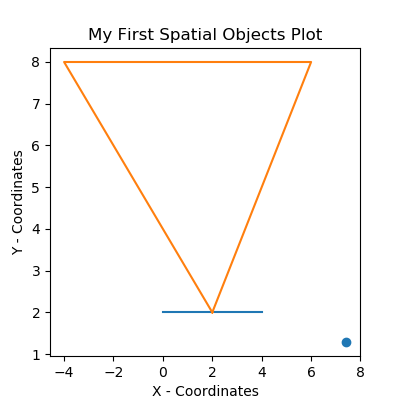

Text(0.5,1,'My First Spatial Objects Plot')

In [22]:
fig, ax = plt.subplots(1, figsize=(4, 4))
plt.scatter(my_first_point.x,my_first_point.y)
plt.plot(my_first_line.xy[0], my_first_line.xy[1])
plt.plot(my_first_polygon.exterior.xy[0], my_first_polygon.exterior.xy[1])
plt.ylabel("Y - Coordinates")
plt.xlabel("X - Coordinates")
plt.title("My First Spatial Objects Plot")

So what are we looking at here? Let's put all our data together. We know that our:
* point = (7.4, 1.3)
* line = [(0, 2), (2, 2), (4, 2)]
* polygon = [(2, 2), (6, 8), (-4, 8)]

So does our data show this? Yes! Congrats you are now basically a GIS expert. Lets go into depth what exactly we did when plotting these spatial objects.



Notice how for each of the objects we used an attribute function to get the feature we wanted specifically.
* For the point we called .x and .y to extract the specific point.
* For the line we called .xy[0] to get the list of x's, and .xy[1] to get the list of y's.
* For the polygon we only wanted to see the exterior of the object so we called .exterior.xy[0] for all x's and .exterior.xy[1] for all the y's.

We have done the boring stuff, lets transition over to some practical application with spatial objects and different data types. 

# Application - Florida

In [23]:
## Check what folder we are currently in
os.getcwd()


'/Users/PrideRock/Google Drive/github/POS4764 (1)/Labs'

In [34]:
## Lets load into the needed folder for this work.
os.chdir('Florida')

In [33]:
os.listdir()

['Florida', 'us_leader_lta.csv']

First thing we want to do is load in our base file.  We are going to be looking at Florida for this brief application. Shapefiles have an extension of .shp. Shapefiles also only work if their accompanying files are also present in the folder which you are loading them from. (These can include .shx, .dbf, .prj, .xml, .sbn, .sbx, .cpg)

In [35]:
florida = gpd.read_file('florida.shp') 

To load our data, all we need is the gpd.read_file function. Then we just pass the name of the shapefile in single quotes. 

In [73]:
help(gpd.read_file)

Help on function read_file in module geopandas.io.file:

read_file(filename, **kwargs)
    Returns a GeoDataFrame from a file.
    
    *filename* is either the absolute or relative path to the file to be
    opened and *kwargs* are keyword args to be passed to the `open` method
    in the fiona library when opening the file. For more information on
    possible keywords, type: ``import fiona; help(fiona.open)``



In [75]:
help(gpd.io.file)

Help on module geopandas.io.file in geopandas.io:

NAME
    geopandas.io.file

FUNCTIONS
    infer_schema(df)
    
    read_file(filename, **kwargs)
        Returns a GeoDataFrame from a file.
        
        *filename* is either the absolute or relative path to the file to be
        opened and *kwargs* are keyword args to be passed to the `open` method
        in the fiona library when opening the file. For more information on
        possible keywords, type: ``import fiona; help(fiona.open)``
    
    to_file(df, filename, driver='ESRI Shapefile', schema=None, **kwargs)
        Write this GeoDataFrame to an OGR data source
        
        A dictionary of supported OGR providers is available via:
        >>> import fiona
        >>> fiona.supported_drivers
        
        Parameters
        ----------
        df : GeoDataFrame to be written
        filename : string
            File path or file handle to write to.
        driver : string, default 'ESRI Shapefile'
            The 

Now that we know a little more about geopandas input file types, lets take a look at the data we loaded in as florida. Easiest thing to do first is to plot it out. 

<IPython.core.display.Javascript object>


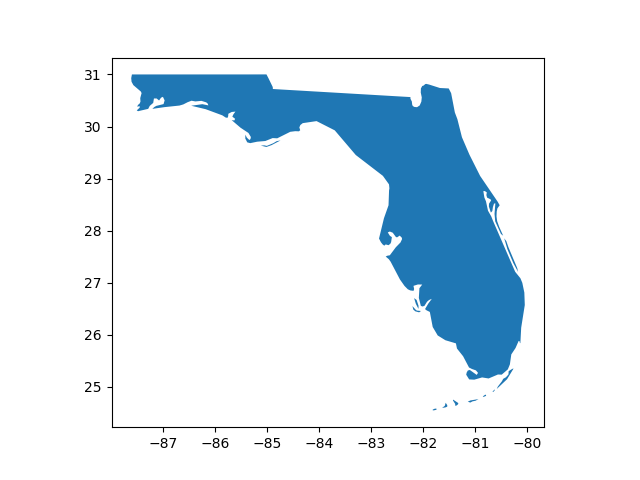

In [36]:
florida.plot()

Yep that looks like florida.  Also notice that longitude and latitude occupy the x and y coordinates. Great we've loaded in a polygon, lets see what the data inside our file looks like.

In [37]:
florida.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
0,Admin-1 scale rank,2,USA-3542,3542,US-FL,http://en.wikipedia.org/wiki/Florida,US,5,Florida,FL|Fla.,...,Florida,Floryda,Flórida,Флорида,Florida,Florida,Florida,佛罗里达州,1159315207,(POLYGON ((-87.48951063106118 30.3776828146096...


This shapefile comes from the natural earth data. It has a variety of information stored within it other than the spatial components of florida. Things like and administrative code, wikipedia link, alternative language names, and most importantly the geometry column. This column is the one that gives us the important geospatial components. Lets see what else we can do with this data.

In [38]:
## The middle point of Florida
florida.centroid

0    POINT (-82.4936138108054 28.65786455691989)
dtype: object

In [39]:
## The outer bounds of Florida
florida.bounds

,minx,miny,maxx,maxy
0,-87.607438,24.542349,-80.041307,31.001673


Now lets load in some more data.

In [40]:
roads = gpd.read_file('florida_roads.shp')

<IPython.core.display.Javascript object>


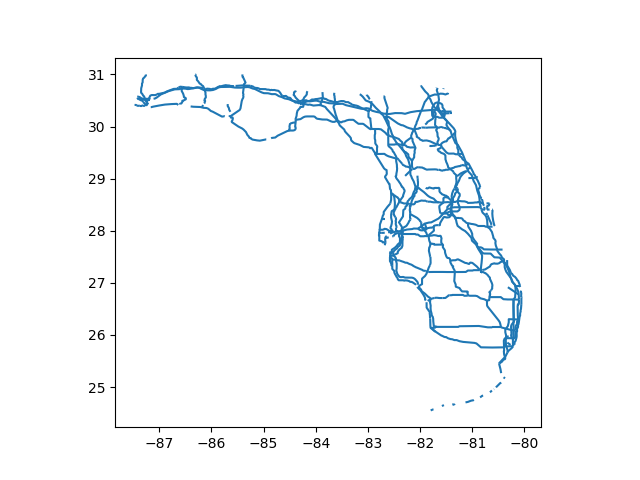

In [41]:
roads.plot()

The roads of florida do a good job of outlining the state itself. This makes sense as many of Florida's major cities are on a coastline (Orlando being an outlier). So the road system will likely connect these exterior units. Let's see what this data looks like.

In [42]:
roads.head()

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,3,Road,Major Highway,USA,,"Version 1.5: Changed alignment, a few adds in ...",95,,,,...,0,0,,227105,North America,1,Interstate,3.0,6.0,LINESTRING (-80.81939331845282 28.412897574738...
1,3,Road,Major Highway,USA,,"Version 1.5: Changed alignment, a few adds in ...",95,,,,...,0,0,,228905,North America,1,Interstate,3.0,6.0,LINESTRING (-80.16817038450152 26.943738635744...
2,3,Road,Major Highway,USA,,"Version 1.5: Changed alignment, a few adds in ...",95,,,,...,0,0,,228205,North America,1,Interstate,3.0,6.0,LINESTRING (-80.3939276682713 27.3987263922653...
3,8,Road,Secondary Highway,USA,,"Version 1.5: Changed alignment, a few adds in ...",27,,,,...,0,0,,229905,North America,0,Federal,7.1,9.6,LINESTRING (-81.9690188711882 28.0846812160274...
4,4,Road,Major Highway,USA,,"Version 1.5: Changed alignment, a few adds in ...",FT,,,,...,0,0,,222505,North America,1,State,4.0,7.0,LINESTRING (-81.54516991991194 28.544515192599...


Hmm interesting.  It looks like this data contains a number of different types of roads. Lets take a look at these and narrow it down to only the major interstates (like I-4, I-95, and I-10).

In [43]:
roads['type'].unique()

array(['Major Highway', 'Secondary Highway', 'Beltway', 'Road'],
      dtype=object)

In [44]:
interstates = roads.loc[roads['type'] == "Major Highway"]

<IPython.core.display.Javascript object>


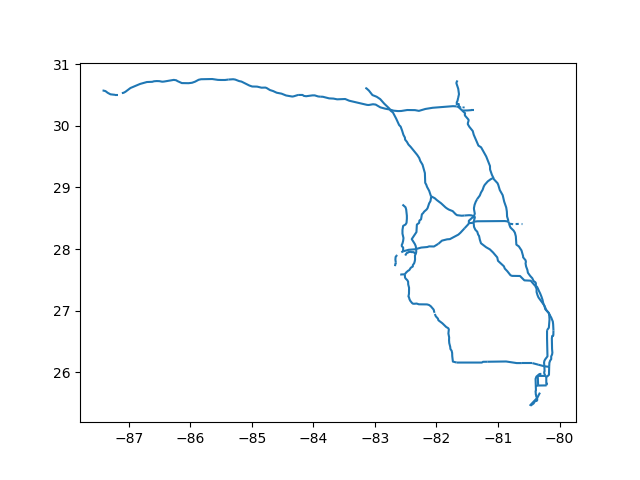

In [45]:
interstates.plot()

Alright now we have a polygon and a file that contains lines. How about a point file? 

A major political issue the United States is currently faced with is that of mass shooting events.  Being one of the only countries in the world that experiences these phenomena at such a scale it has become a contentious issue that warrants serious thought. 

One attempt to collect information on mass shootings has been undertaken by the investigative news organizations _Mother Jones_.  As a disclaimer, while I have no reason to believe this database is invalid, I always suggest to be vigiliant in checking the methodologies used to collect data.  Not all data is created equal, and being critical of sources is a valuable quality in any researcher.  

In [46]:
mass_shoot = pd.read_csv('mother_jones.csv', encoding='latin-1')

In [47]:
mass_shoot.head(5)

,Unnamed: 0,case,location,date,summary,fatalities,injured,total_victims,location_1,age_of_shooter,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,0,SunTrust bank shooting,"Sebring, FL",1/23/19,"Zephen A. Xaver, 21, fatally shot five women i...",5,0,5,Workplace,21,...,9 mm handgun,White,M,https://wsbt.com/news/local/classmate-says-flo...,https://wsbt.com/news/local/classmate-says-flo...,-,27.471043,-81.458470,Mass,2019
1,1,Marjory Stoneman Douglas High School shooting,"Parkland, FL",2/14/18,"Nikolas J. Cruz, 19, heavily armed with an AR-...",17,17,34,School,19,...,AR-15,White,M,https://www.nytimes.com/2018/02/14/us/parkland...,https://www.nytimes.com/2018/02/15/us/nikolas-...,https://www.nytimes.com/2018/02/14/us/parkland...,26.304830,-80.269511,Mass,2018
2,2,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Workplace,45,...,-,-,M,http://www.postandcourier.com/news/multiple-pe...,-,http://www.postandcourier.com/news/multiple-pe...,28.580295,-81.294086,Mass,2017
3,3,Fort Lauderdale airport shooting,"Fort Lauderdale, Florida",1/6/2017,"Esteban Santiago, 26, flew from Alaska to Fort...",5,6,11,Airport,26,...,Walther 9mm semi-automatic pistol[,Latino,M,http://www.nytimes.com/2017/01/07/us/esteban-s...,http://www.nytimes.com/2017/01/07/us/esteban-s...,http://www.nytimes.com/2017/01/07/us/esteban-s...,26.072751,-80.143382,Mass,2017
4,4,Orlando nightclub massacre,"Orlando, Florida",6/12/2016,"Omar Mateen, 29, attacked the Pulse nighclub i...",49,53,102,Other,29,...,"Sig Sauer MCX rifle, Glock 17 9mm; high-capaci...",Other,M,http://www.motherjones.com/politics/2016/06/as...,-,http://www.motherjones.com/politics/2016/06/as...,28.519718,-81.376777,Mass,2016


So we have a data set here (pandas dataframe) which looks a lot like our previous GeoDataFrame. But the type is not spatial.  In order to make this data spatial like our shapefiles, we need to provide it with a geometry.  Geometry as you will remember are the points, lines, and polygon units.  Luckily this data set does have a couple of columns that are perfect for creating a spatial data frame. These columns are longitude and latitude.

In [48]:
mass_geometry = [Point(xy) for xy in zip(mass_shoot.longitude, mass_shoot.latitude)]

Alright this line of code is a little complex so lets break it down to make sure it all makes sense. 
* [] encloses the entire operation because we want a list of geometric points. Try printing out geometry to see what it looks like.
* Point(xy) - so here we are saying that each element in the list will be a spatial Point() object. 
* for xy - xy is two elements, the x and y coordinates and we are saying for each of these in..
* in zip() - zip means to put two elements together. For example if you had a list of first_names = john , joe, jrue and last_names = white, blue, green then if we zipped these two our resulting object would be john white, joe blue, and jrue green.
* mass_shoot.longitude, mass_shoot.latitude - these are the two elements we are putting together to make the geometry object.

Now that we have a geometry object we have all the neccessary components to make the GeoDataFrame!

In [49]:
mass_gdf = gpd.GeoDataFrame(mass_shoot, geometry = mass_geometry)

In [50]:
from fiona.crs import from_epsg
mass_gdf.crs = from_epsg(4326)

In [51]:
mass_gdf.geometry

0     POINT (-81.45846999999999 27.471043)
1      POINT (-80.26951099999999 26.30483)
2     POINT (-81.29408599999999 28.580295)
3     POINT (-80.14338199999999 26.072751)
4             POINT (-81.376777 28.519718)
5             POINT (-80.311775 25.864338)
6     POINT (-82.57058599999999 27.966479)
7    POINT (-81.65565100000001 30.3321838)
8    POINT (-80.64296949999999 28.0331886)
9     POINT (-80.22668299999999 25.796491)
Name: geometry, dtype: object

<IPython.core.display.Javascript object>


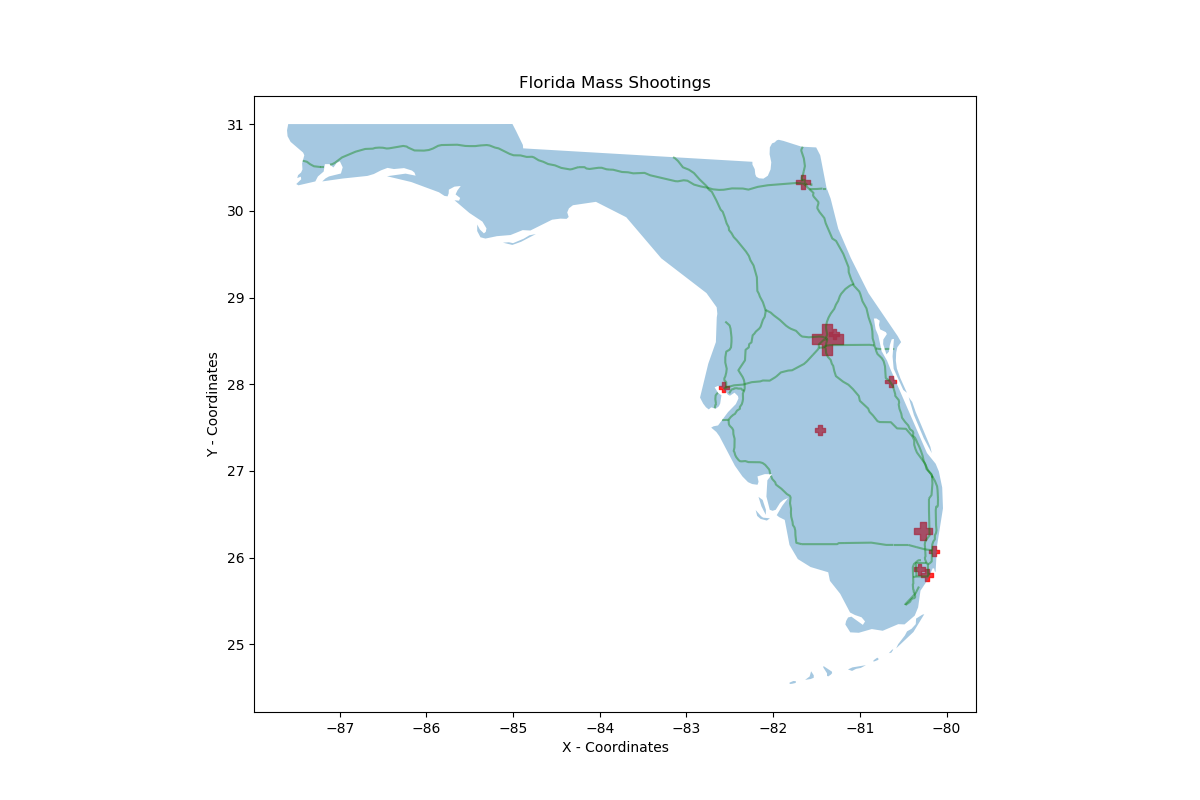

Text(0.5,1,'Florida Mass Shootings')

In [52]:
fig, ax = plt.subplots(1, figsize=(12, 8))
mass_gdf.plot(ax=ax,marker='P', markersize=mass_gdf['fatalities']*10, color='red',alpha=.8)
florida.plot(ax=ax, alpha=0.4)
interstates.plot(ax=ax, color='green', alpha=0.4)
ax.set_aspect('equal')
plt.ylabel("Y - Coordinates")
plt.xlabel("X - Coordinates")
plt.title("Florida Mass Shootings")